<a href="https://colab.research.google.com/github/EtheSonX082531/PYTHON-CODES-AND-PROJECTS/blob/main/Langgraph_Order_Processing_Sys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from typing import TypedDict
from langgraph.graph import StateGraph,START,END

class AgentState(TypedDict):
    order_amount:float
    coupon_code:str
    discount:float
    final_price:float
    user_balance:float
    status:str
    message:str
    attempts:int

def input_node(state:AgentState)->AgentState:
    state['order_amount']=float(input("Enter u'r Order amount: "))
    state['coupon_code']=input("Enter u'r Coupon code: ")
    state['user_balance']=float(input("Enter u'r Balance: "))
    state["attempts"]=0
    return state


def coupon_validate_node(state:AgentState)->AgentState:
    return state

def router_coupon_validation(state:AgentState)->str:
    if("OFF" in state['coupon_code']):
        digit=""
        for ch in state['coupon_code']:
            if(ch>="0" and ch<="9"):
                digit=digit+ch

        if len(digit)<3 and digit:
             return "discount_node_edge"

        elif(state["attempts"]<3):
             return "retry_coupon_node_edge"

        else:
            return "cancel_node_edge"

    elif(state["attempts"]<3):
        return "retry_coupon_node_edge"
    else:
        return "cancel_node_edge"

def discount_node(state:AgentState)->AgentState:
    digit=""
    for ch in state['coupon_code']:
        if(ch>="0" and ch<="9"):
            digit=digit+ch

    digit=float(digit)

    discount=digit/100
    state["final_price"]=state["order_amount"]-(state["order_amount"]*discount)
    return state

def balance_check_node(state:AgentState)->AgentState:
    return state

def router_balance_check_node(state:AgentState)->str:
    if(state["user_balance"]>=state["final_price"]):
        return "confirm_node_edge"
    else:
        state["message"]=f"Your balance is insufficient for this order.You have {state['user_balance']} where your Ordered amount after discount is {state['final_price']}"
        return "cancel_node_edge"

def retry_coupon_node(state:AgentState)->AgentState:
    state["attempts"]+=1
    state["coupon_code"]=input("Enter Coupon code again: ")
    return state

def confirm_node(state:AgentState)->AgentState:
    state["status"]="Confirmed"
    state["message"]=f"Your order is: {state['status']}.Thank You...."
    return state

def cancel_node(state:AgentState)->AgentState:
    state["status"] = "Cancelled"

    existing_message = state.get("message", "")

    state["message"] = f"{existing_message}\nYour order is: {state['status']}. Sorry!...."

    return state



def final_node(state:AgentState)->AgentState:
    print(state["message"])
    print("Program execution finished......")
    return state

graph=StateGraph(AgentState)

graph.add_node("input_node",input_node)
graph.add_node("coupon_validate_node",coupon_validate_node)
graph.add_node("discount_node",discount_node)
graph.add_node("balance_check_node",balance_check_node)
graph.add_node("retry_coupon_node",retry_coupon_node)
graph.add_node("confirm_node",confirm_node)
graph.add_node("cancel_node",cancel_node)
graph.add_node("final_node",final_node)


graph.add_edge(START,"input_node")
graph.add_edge("input_node","coupon_validate_node")

graph.add_conditional_edges(
    "coupon_validate_node",
    router_coupon_validation,
    {
        "discount_node_edge":"discount_node",
        "retry_coupon_node_edge":"retry_coupon_node",
        "cancel_node_edge":"cancel_node"
    }
)

graph.add_edge("retry_coupon_node","coupon_validate_node")

graph.add_edge("discount_node","balance_check_node")

graph.add_conditional_edges(
    "balance_check_node",
    router_balance_check_node,
    {
        "confirm_node_edge":"confirm_node",
        "cancel_node_edge":"cancel_node"
    }
)

graph.add_edge("confirm_node","final_node")
graph.add_edge("cancel_node","final_node")
graph.add_edge("final_node",END)

app=graph.compile()

output=app.invoke({})

Enter u'r Order amount: 400
Enter u'r Coupon code: OFF20
Enter u'r Balance: 200

Your order is: Cancelled. Sorry!....
Program execution finished......


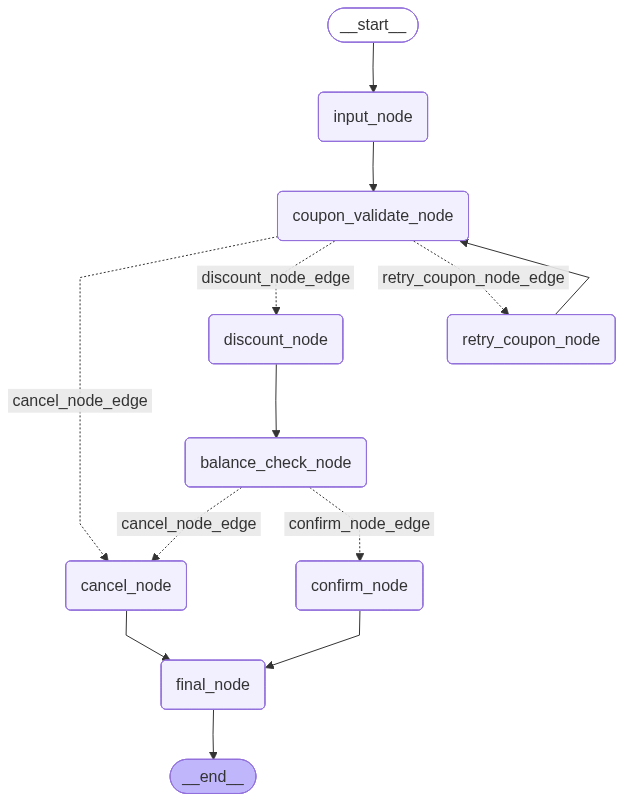

In [2]:
from IPython.display import Image,display
display(Image(app.get_graph().draw_mermaid_png()))